# Day03

今回も IrisDatasetを利用するので事前に、標準化を行った後、
scikit-learnの `train_test_split` 関数で学習データとテストデータに分割しておく。
今回はマルチクラス分類なのですべてのラベルを使用する。

In [23]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# データを学習用と推論用に分割
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 決定木
`scikit-learn`を利用して[決定木](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)による分類を実装する。  
主なパラメータ
- criterion: 不純度. `"gini"`, `"entropy"`, `"log_loss"`から選べる
- max_depth: 木の深さの最大値
- random_state: 乱数シード

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 決定木のインスタンス作成
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
# 学習
tree_model.fit(X_train, y_train)

# 推論
y_pred = tree_model.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.947


決定木を可視化すると、どの条件によって分類されているかがわかる。

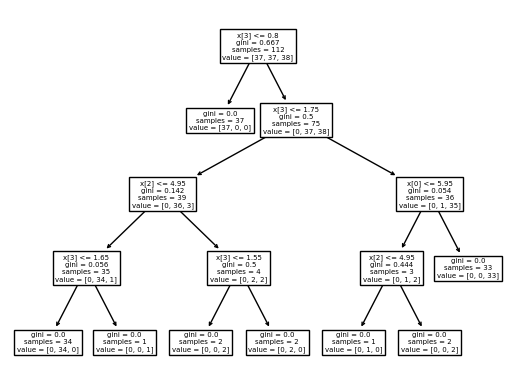

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()

## ランダムフォレスト
`scikit-learn`を利用して[ランダムフォレスト](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)による分類を実装する。

主なパラメータ
- criterion: 不純度. `"gini"`, `"entropy"`, `"log_loss"`から選べる
- n_estimators: 決定木の数
- random_state: 乱数シード
- 並列化に使用するプロセサの数

多数の決定木を使用して多数決をしているので、単体の決定木よりは精度が良くなっていることがわかる。

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
rf.fit(X_train, y_train)

# 推論
y_pred = rf.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.974


## k最近傍法(KNN)
`scikit-learn`を利用して[k最近傍法(KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)による分類を実装する。

主なパラメータ
- n_neighbors: いくつの最近傍点を使用するか
- p: 距離の指標
    - `1`: マンハッタン距離
    - `2`: ユーグリット距離

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)

# knn
y_pred = rf.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.974
